In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
from scipy.integrate import quad
from scipy.special import comb
expon = lambda n: stat.gamma(n, loc = 1)
my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

Все плотности на одном графике

In [ ]:
def total_PDF(x, n, a, b, c, d):
    sum = 0
    k = 0
    while (k <= n):
        sum += (comb(n, k) * my_norm(k * a + (n - k) * c, k * b + (n - k) * d).pdf(x)) / 3 ** n * (2 ** (n - k))
        k += 1
    return sum
    
x = np.linspace(0.01, 100, 500);

#a = 10; b = 1; c= 20; d = 6;

a = 10; b = 1; c= 20; d = 6;
for i in range(10):
    plt.plot(x, total_PDF(x, i+1, a, b, c, d))
    #plt.plot([166, 166, 166], [0.006, 0.04, 0.003])
    plt.show()
#x2 = np.linspace(700, 800, 10000)
#plt.plot(x2, total_PDF(x2, 500))
#plt.show()

In [ ]:
def c_n_total_PDF(x, n, a, b, c, d):
    stdev = m.sqrt((2 / 9 * a * a + b / 3 + 2 / 9 * c * c + 2 / 3 * d - 4 * a * c / 9) * n)
    return stdev * total_PDF(x * stdev + (a/3 + 2 * c/3) * n, n, a, b, c, d)

#m.sqrt(n / 9 * (b * b + 4 * d * d)) - best disp
x = np.linspace(-5, 5, 100);

for i in range(10):
    plt.plot(x, c_n_total_PDF(x, i+1, a, b, c, d))
plt.plot(x, my_norm(0, 1).pdf(x), color = 'k')
plt.show()

plt.plot(x, c_n_total_PDF(x, 100, a, b, c, d))



plt.plot(x, c_n_total_PDF(x, 200, a, b, c, d))
#plt.plot(x, c_n_total_PDF(x, 1000, a, b, c, d))
plt.plot(x, my_norm(0, 1).pdf(x), color = 'k')
#print(c_n_total_PDF(0, 500))
podg = c_n_total_PDF(0, 500, a, b, c, d)
print(1/ 2 / m.pi * (podg) ** (-2))
plt.show()

In [ ]:
#integrand = lambda x, n, a1, b1, c1, d1: c_n_total_PDF(x, n, a1, b1, c1, d1) 
#print("Integral = ", quad(integrand, -np.inf, np.inf, args = (100, a, b, c, d)))

${\bf D} sum = n{\bf D} X_1 = n / ???$

${\bf D} (X * \xi + Y * (1 - \xi)) = {\bf D} (X * \xi) + {\bf D} (Y * (1 - \xi)) = $

${\bf D} X * {\bf D} \xi + {\bf M^2} X * {\bf D} \xi + {\bf M^2} \xi * {\bf D} X + (!) {\bf D} Y * {\bf D} (1 - \xi) + {\bf M^2} Y * {\bf D} (1 - \xi) + {\bf M^2} (1 - \xi) * {\bf D} Y =$

$= \frac{2}{9}b + \frac{2}{9}a^2 + \frac{1}{9} b + 2 / 9 d + 2/9 c^2 + 4/9 d =$

$= \frac{2}{9}a^2 + \frac{b}{3} + \frac{2}{9}c^2 + \frac{2}{3} d$

^^^ $ -\dfrac{4}{9}ac$ ^^^, что получено через моменты

### Функции распределения

$\eta \sim$ смесь;
$\eta \sim X \cdot \xi + Y \cdot (1 - \xi)$, где $X \sim {\bf N}(a, b)$, $Y \sim {\bf N}(c,d)$

${\bf D} \eta = \dfrac{2}{9}a^2 + \dfrac{1}{3}b + \dfrac{2}{9}c^2 + \dfrac{2}{3} d -\dfrac{4}{9}ac$

${\bf E}\eta = \dfrac{1}{3}a + \dfrac{2}{3}c$; $\quad$
${\bf E}\eta^2 = \dfrac{1}{3} (a^2 + b) + \dfrac{2}{3} (c^2 + d)$

${\bf E} (\eta - {\bf E}\eta)^3 = {\bf E}\eta^3 - 3{\bf E}\eta {\bf E}\eta^2 + 3{\bf E}^2\eta{\bf E}\eta - {\bf E}^3 \eta$

${\bf E} \eta^3 = \frac{1}{3} {\bf E}X^3 + \frac{2}{3} {\bf E}Y^3
= \dfrac{a^3 + 3ab}{3} + \dfrac{2c^3 + 6cd}{3}
= \dfrac{a^3 + 2c^3}{3} + ab + 2 cd$


${\bf E} (\eta - {\bf E}\eta)^3 = $ || подстановка, раскрытие скобок ||

$= 2 / 27 * a^3 + 16 / 27 * c^3 - 10 / 27 * a * c * c - 5 / 27 * a * a * c + 2 / 3 * a * b + 4 / 3 * c * d - 2 / 3 * a * d - b * c / 3$

Я посчитал ${\bf E} (\eta - {\bf E} \eta)^3$, который по модулю меньше, чем
${\bf E} |\eta - {\bf E} \eta|^3$. Даже с таким параметром функция распределения суммы лежит в границах неравенства Берри-Эссеена
#### Как считать третий момент нормального?

Характеристическая функция ${\bf N}(\mu, \sigma^2)$ - это 
$exp\big(i\mu t -\dfrac{\sigma^2 t^2}{2}\big)$

первая производная:$(i\mu - \sigma^2 t) \cdot exp(...)$

вторая производная:$(i\mu - \sigma^2 t)^2 \cdot exp(...) - \sigma^2 \cdot exp(...)$

третья производная:
$(i\mu - \sigma^2 t)^3 \cdot exp(...)
- 2\sigma^2(i\mu - \sigma^2 t) \cdot exp(...)
- \sigma^2(i\mu - \sigma^2 t) \cdot exp(...)$

При $t = 0$ получим:
$$
\alpha_3 = \dfrac{(i\mu)^3 - 3 i \sigma^2 \mu}{i^3} = \mu^3 + 3 \sigma^2 \mu
$$


In [11]:
def total_СDF(x, n, a, b, c, d):
    sum = 0
    k = 0
    while (k <= n):
        sum += (comb(n, k) * my_norm(k * a + (n - k) * c, k * b + (n - k) * d).cdf(x)) / 3 ** n * (2 ** (n - k))
        k += 1
    return sum

#print(my_norm(a + (50 - 1) * c, b + (50 - 1) * d).cdf(a + 49 * c))
#print(my_norm(1 * a + 49 * c, 1 * b + 49 * d).сdf(a + 49 *c))
print(my_norm(1, 1).cdf(a + 49 * c))

def c_n_total_CDF(x, n, a, b, c, d):
    stdev = m.sqrt((2 / 9 * a * a + b / 3 + 2 / 9 * c * c + 2 / 3 * d - 4 * a * c / 9) * n)
    return total_СDF(x * stdev + (a/3 + 2 * c/3) * n, n, a, b, c, d)



1.0


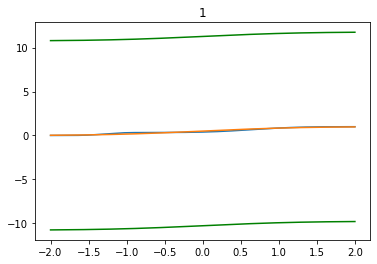

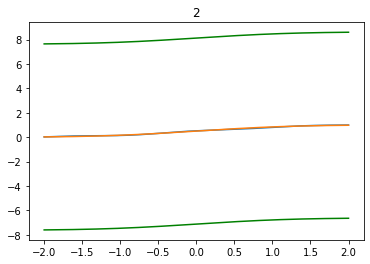

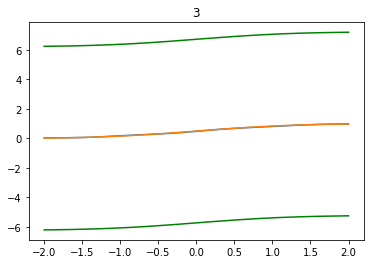

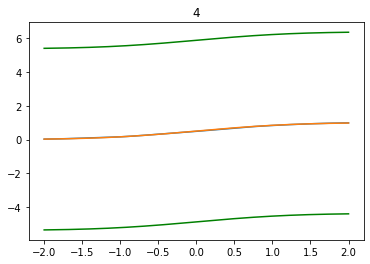

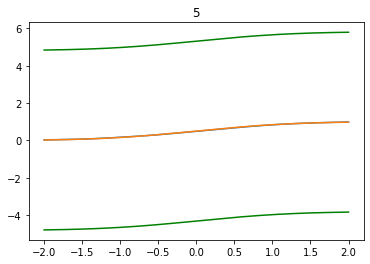

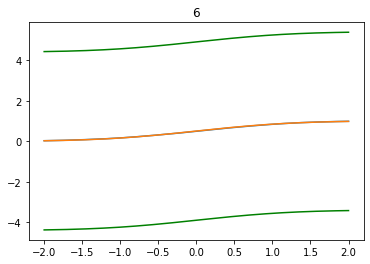

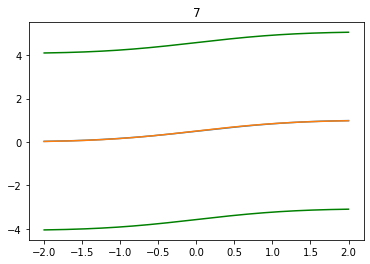

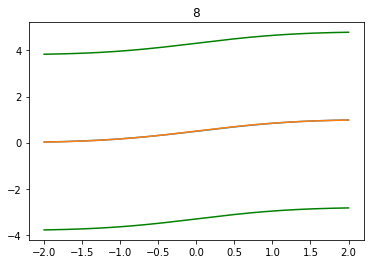

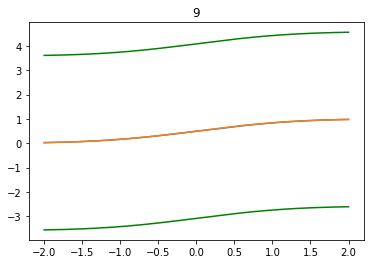

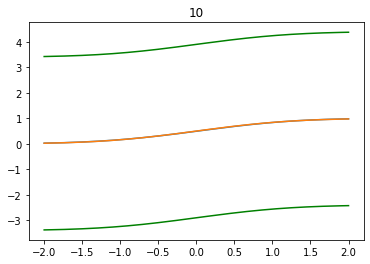

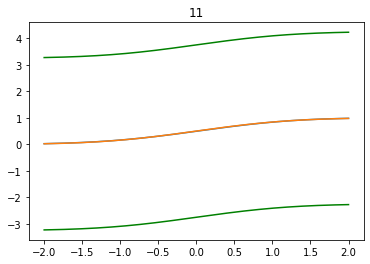

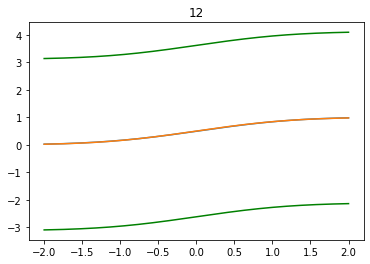

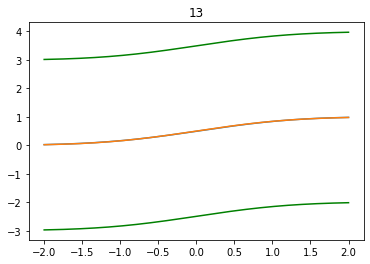

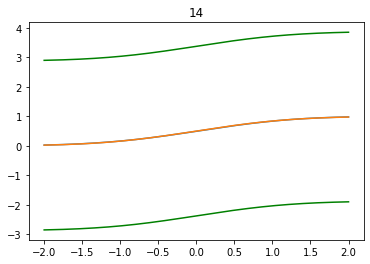

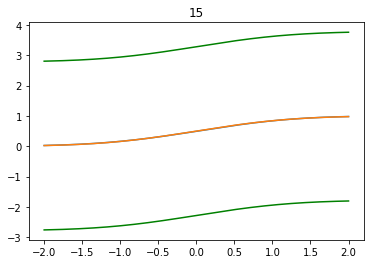

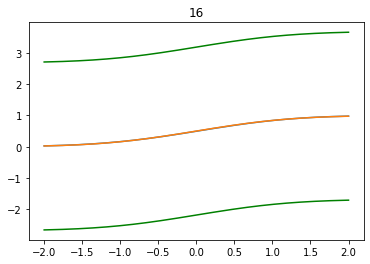

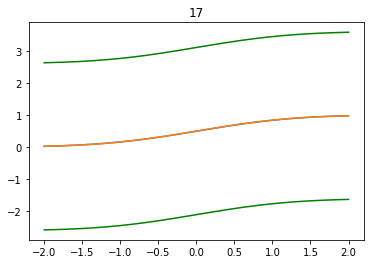

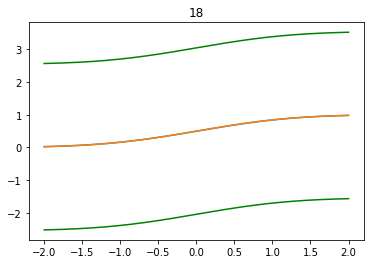

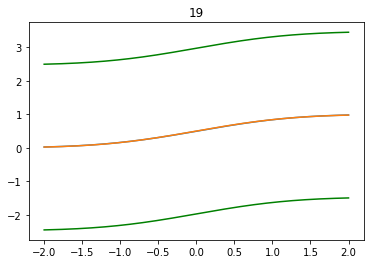

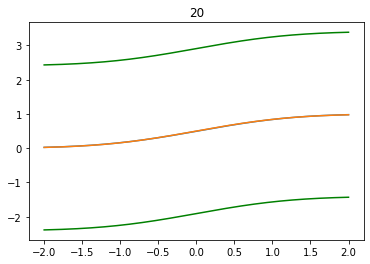

In [12]:
x2 = np.linspace(-2, 2, 1000)
const_B_E = 0.4784

a1 = 10; b1 = 1; c1 = 20; d1 = 6;
for i in range(20):
    plt.plot(x2, c_n_total_CDF(x2, i+1, a1, b1, c1, d1))
    
    stdev = m.sqrt((2 / 9 * a * a + b / 3 + 2 / 9 * c * c + 2 / 3 * d - 4 * a * c / 9))
    third_moment = 2 / 27 * a ** 3 + 16 / 27 * c ** 3 - 10 / 27 * a * c * c - 5 / 27 * a * a * c + 2 / 3 * a * b + 4 / 3 * c * d - 2 / 3 * a * d - b * c / 3
    
    delta_f = const_B_E * abs(third_moment) / (stdev ** 3 * m.sqrt(i+1))
    plt.plot(x2, my_norm(0, 1).cdf(x2) + delta_f, color = 'green')
    plt.plot(x2, my_norm(0, 1).cdf(x2))
    plt.plot(x2, my_norm(0, 1).cdf(x2) - delta_f, color = 'green')
    
    plt.title(i+1)
    plt.show()
    
    
    
